In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, precision_score, recall_score,roc_auc_score,accuracy_score,precision_recall_curve,average_precision_score,roc_auc_score

In [2]:
df = pd.read_csv("diabetes.csv")
df1 = pd.read_csv("diabetes_dataset__2019.csv")

In [3]:
df.columns

Index(['id', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
df1.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

In [5]:
df1['RegularMedicine'].value_counts()

no     615
yes    336
o        1
Name: RegularMedicine, dtype: int64

In [6]:
len(df1)

952

In [7]:
data=df.drop(['max_glu_serum','A1Cresult'],axis=1)

In [8]:
data

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,101763,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,101764,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,101765,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [9]:
data.isna().sum()

id                          0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [11]:
cat_vars=data.select_dtypes(include=['object']).columns.tolist()
int_vars = data.select_dtypes(include=['int', 'float']).columns.tolist()


In [12]:
int_vars

['id',
 'encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

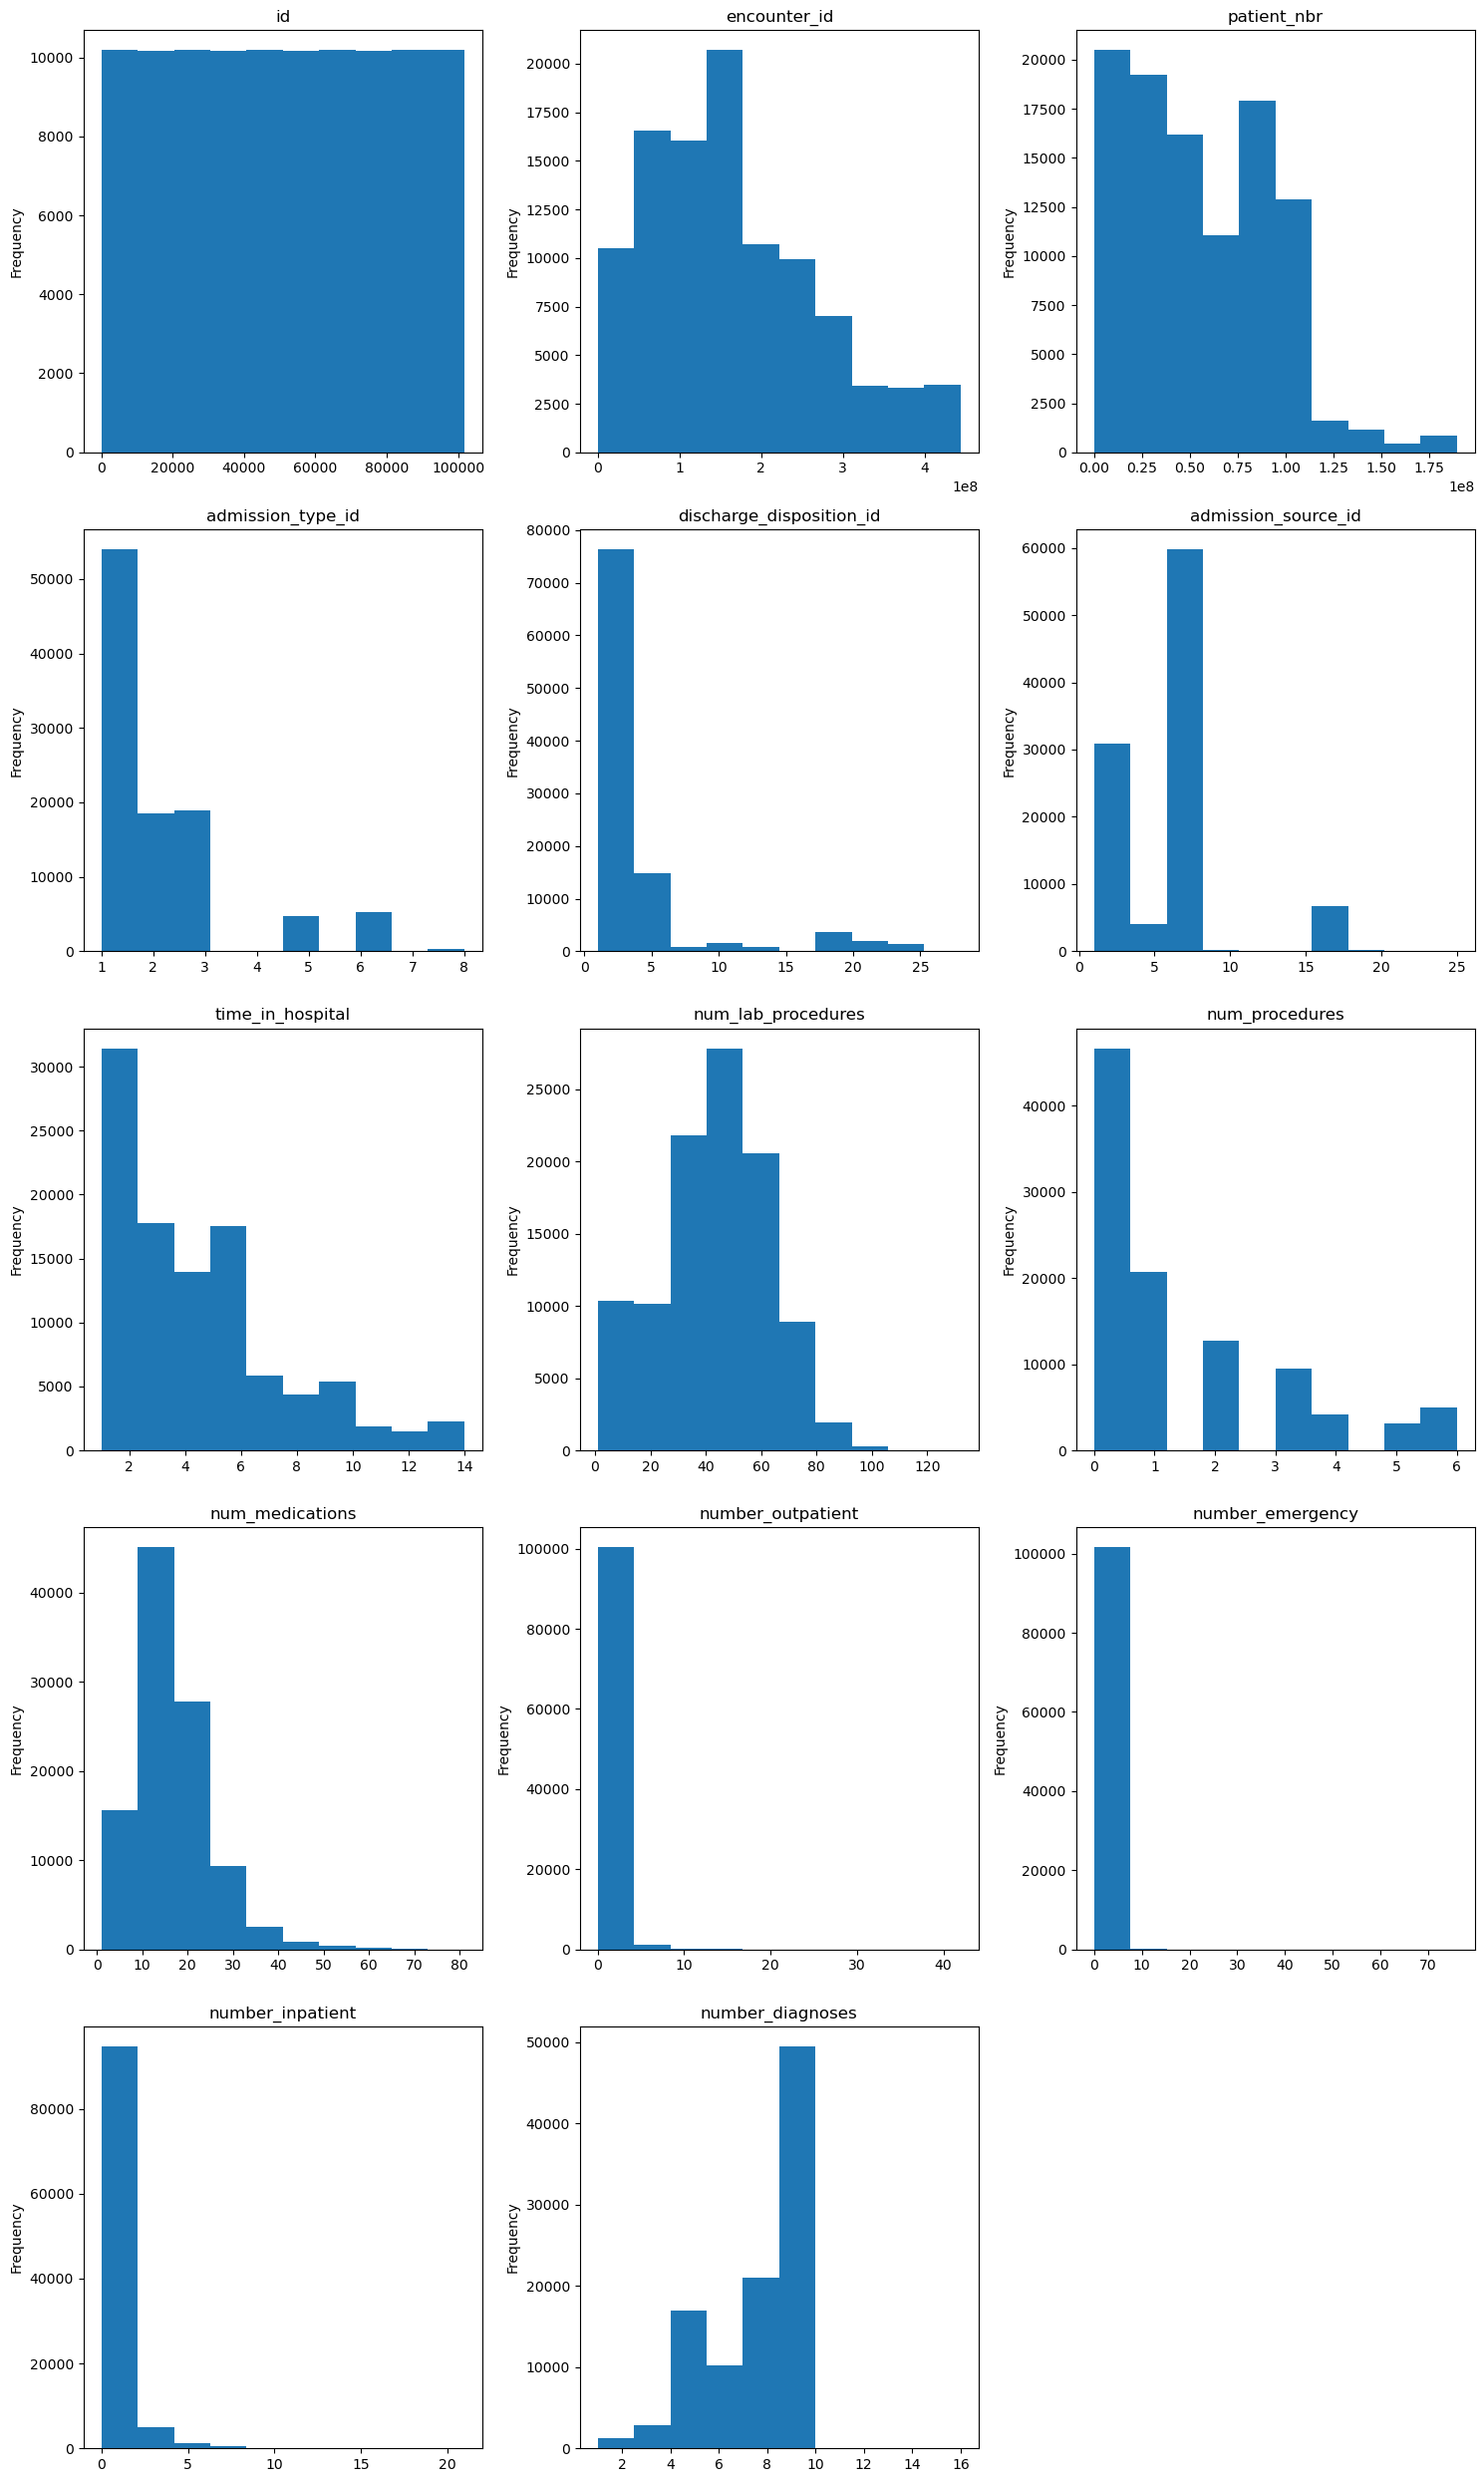

In [13]:
int_vars = data.select_dtypes(include=['int', 'float']).columns.tolist()

num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(int_vars):
    data[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()

plt.show()

In [14]:
for col in ['num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']:
  data[col] = data[col].apply(lambda x: np.log(x+1))

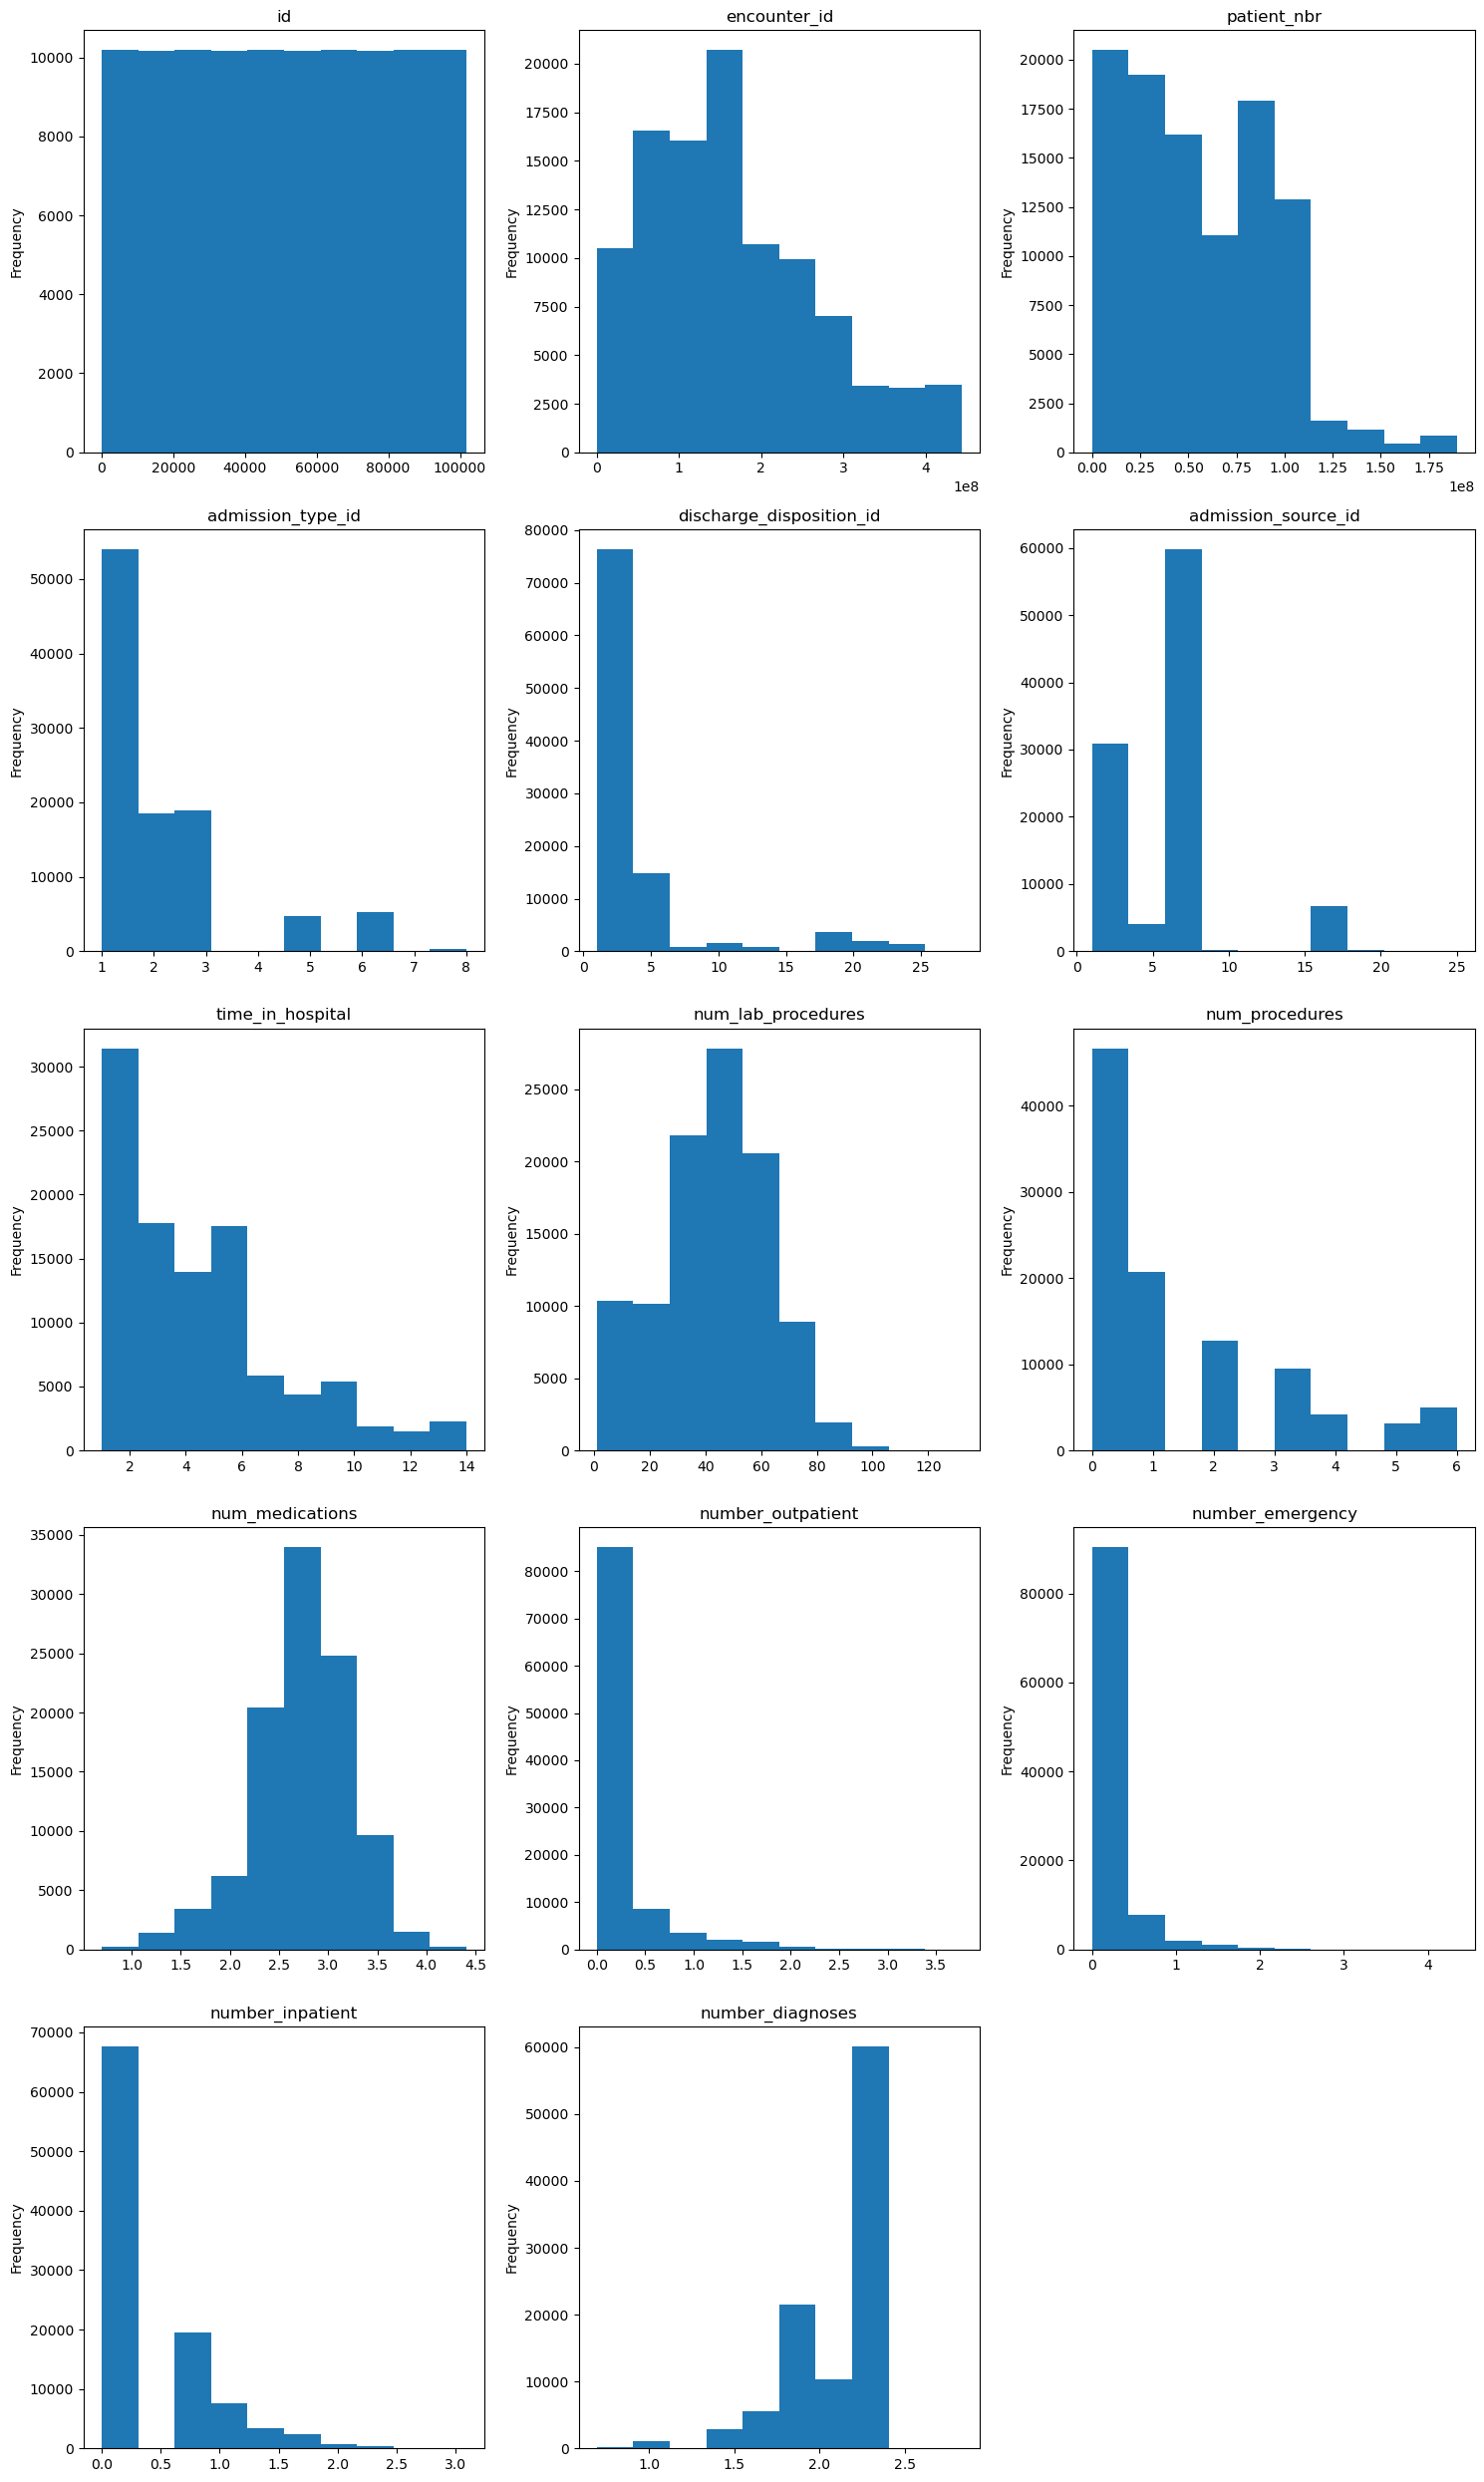

In [15]:
int_vars = data.select_dtypes(include=['int', 'float']).columns.tolist()

num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(int_vars):
    data[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()

plt.show()

In [16]:
data=data.replace("?",np.NAN)
data

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,101763,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,101764,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,101765,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [17]:
for column in data.columns:
    mode_value = data[column].mode()[0]  # Calculate the mode for the column
    data[column].fillna(mode_value, inplace=True)
    data[column].fillna(mode_value,inplace=True)

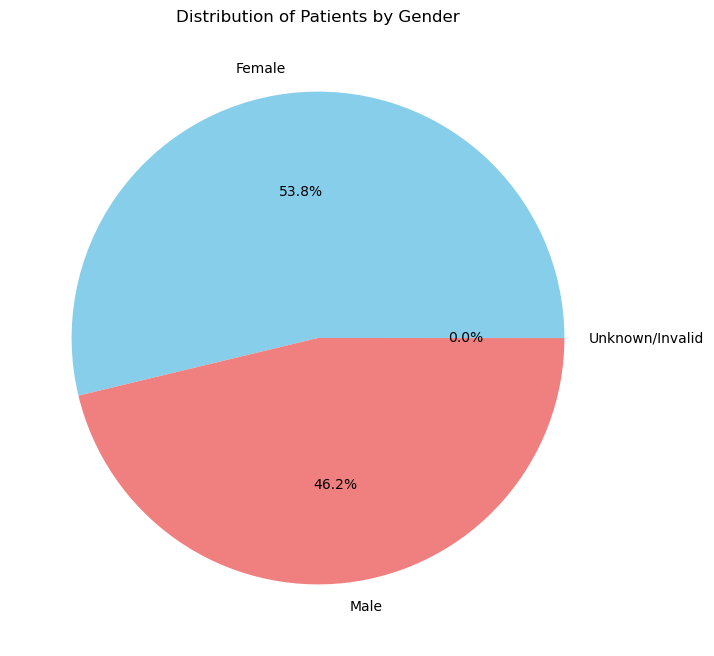

In [18]:
gender_data = data['gender'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Patients by Gender')
plt.show()


The pie chart illustrates the distribution of patients by gender. It provides insight into the gender composition of the dataset, allowing for a quick understanding of the male-to-female ratio.



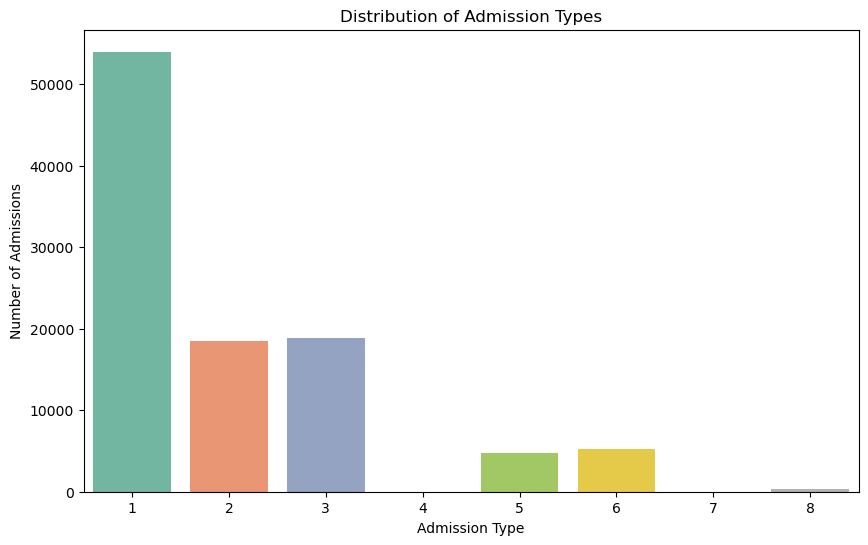

In [19]:
admission_type_data = data['admission_type_id'].value_counts()

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=admission_type_data.index, y=admission_type_data, palette="Set2")
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.show()

this chart visualizes the distribution of admission types. It helps in understanding the frequency of different types of admissions, providing insights into the nature of patient visits.



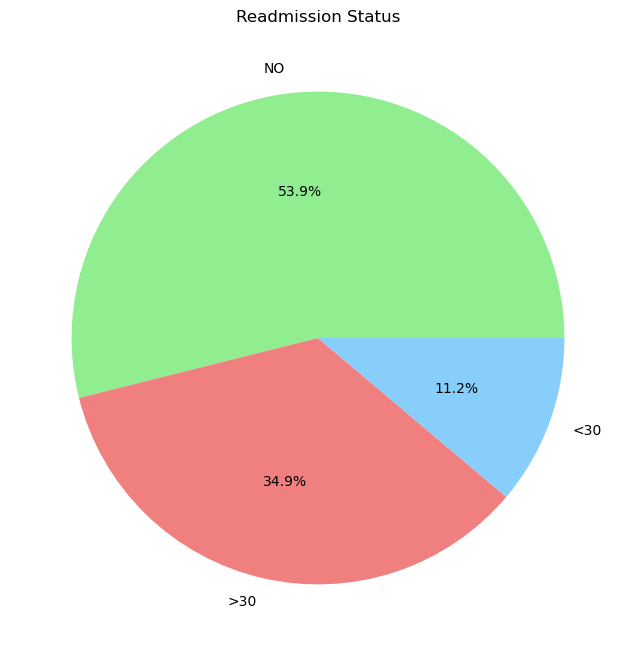

In [20]:
readmission_data = data['readmitted'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(readmission_data, labels=readmission_data.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Readmission Status')
plt.show()

The pie chart displays the distribution of readmission status. It indicates the percentage of patients who were readmitted, not readmitted, or readmitted after 30 days. This information is crucial for assessing the effectiveness of the initial treatment.

In [21]:
df1

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [22]:
df1.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [23]:
for column in df1.columns:
    mode_value = df1[column].mode()[0]  # Calculate the mode for the column
    df1[column].fillna(mode_value, inplace=True)
    df1[column].fillna(mode_value,inplace=True)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               952 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        952 non-null    float64
 15  Pdiabetes         952 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [25]:
cat_=df1.select_dtypes(include=['object']).columns.tolist()
int_v = df1.select_dtypes(include=['float64']).columns.tolist()


In [26]:
cat_

['Age',
 'Gender',
 'Family_Diabetes',
 'highBP',
 'PhysicallyActive',
 'Smoking',
 'Alcohol',
 'RegularMedicine',
 'JunkFood',
 'Stress',
 'BPLevel',
 'Pdiabetes',
 'UriationFreq',
 'Diabetic']

In [27]:
int_v

['BMI', 'Pregancies']

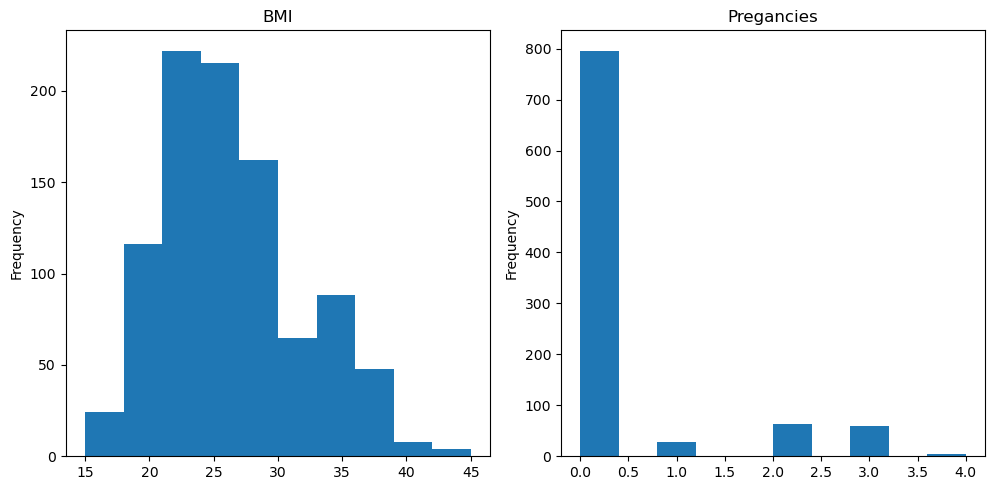

In [29]:

num_cols = len(int_v)
num_rows = (num_cols + 2) // 3  
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(int_v):
    df1[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()

plt.show()